In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv(r"C:\Users\Adam\Desktop\MLF_GP1_CreditScore.csv")
df.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


## EDA

In [2]:
print("Number of rows: ", len(df.index))
print("Number of columns: ",len(df.columns))

Number of rows:  1700
Number of columns:  28


In [3]:
df.dtypes

Sales/Revenues              float64
Gross Margin                float64
EBITDA                      float64
EBITDA Margin               float64
Net Income Before Extras    float64
Total Debt                  float64
Net Debt                    float64
LT Debt                     float64
ST Debt                     float64
Cash                        float64
Free Cash Flow              float64
Total Debt/EBITDA           float64
Net Debt/EBITDA             float64
Total MV                    float64
Total Debt/MV               float64
Net Debt/MV                 float64
CFO/Debt                    float64
CFO                         float64
Interest Coverage           float64
Total Liquidity             float64
Current Liquidity           float64
Current Liabilities         float64
EPS Before Extras           float64
PE                          float64
ROA                         float64
ROE                         float64
InvGrd                        int64
Rating                      

In [4]:
df.shape

(1700, 28)

In [5]:
df.dropna()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1
5,-0.000975,0.028962,0.088716,0.089782,0.115293,0.044688,0.029130,-0.145020,2.069438,0.237230,...,0.113915,14.629626,-0.011534,0.251670,0.125954,0.317581,0.154518,0.233034,1,A1
6,0.007962,0.027144,0.088716,0.080115,0.109771,0.009596,-0.007628,-0.073851,0.477672,0.204333,...,0.066788,0.794767,0.120643,0.074683,0.121771,0.142614,0.134685,0.244263,1,A1
7,0.007962,0.027144,0.099030,0.090350,0.109771,0.009596,-0.007628,-0.073851,0.477672,0.204333,...,0.076895,0.794767,0.120643,0.074683,0.121771,0.096257,0.134685,0.244263,1,A1
8,0.013933,0.033939,0.099030,0.083930,0.141935,0.002516,-0.000821,-0.050053,0.297387,0.040248,...,0.083493,0.595690,0.005384,0.034679,0.158672,0.057714,0.170059,0.233218,1,A1
9,0.016340,0.028670,0.099030,0.081359,0.104525,0.011605,-0.003394,-0.024907,0.195448,0.209254,...,0.059150,0.185214,0.124636,0.075246,0.117438,-0.001900,0.112976,0.201724,1,A1


In [6]:
df.shape

(1700, 28)

In [7]:
print("Table 1:")
print("Count for each rating: ")
df.groupby("Rating")["Rating"].count().reset_index(name="count").T

Table 1:
Count for each rating: 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Rating,A1,A2,A3,Aa2,Aa3,Aaa,B1,B2,B3,Ba1,Ba2,Ba3,Baa1,Baa2,Baa3,Caa1
count,122,156,31,65,174,2,69,48,37,17,125,108,179,326,232,9


In [8]:
print("Count for investment grade bonds: ")
print(" ")
print("1 = investment grade")
print("0 = non investment grade")
print("Table 2:")
df['InvGrd'].value_counts()

Count for investment grade bonds: 
 
1 = investment grade
0 = non investment grade
Table 2:


1    1287
0     413
Name: InvGrd, dtype: int64

In [9]:
df.describe()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.050378,0.026007,0.068718,0.021074,0.123026,0.822405,-0.419810,1.255168,3.142797,0.466620,...,-0.189317,0.298785,-0.855714,0.436002,0.072802,0.032196,0.497705,0.019394,-0.217604,0.757059
std,0.161910,0.273768,0.237365,0.189025,14.475689,13.317075,28.385702,16.224453,51.986550,1.859494,...,5.668669,5.265291,22.926862,1.904282,0.266471,6.151994,12.102502,14.594193,15.389000,0.428986
min,-0.661715,-0.794722,-0.782254,-0.805153,-289.000000,-0.903014,-493.305578,-0.921515,-0.997692,-0.990982,...,-161.609425,-0.991976,-502.000000,-0.994141,-0.684678,-96.250000,-59.795133,-305.462167,-373.837267,0.000000
25%,-0.005693,-0.020028,-0.022640,-0.042771,-0.158478,-0.076316,-0.120725,-0.094767,-0.337959,-0.195117,...,-0.115159,-0.096996,-0.857013,-0.227327,-0.072734,-0.152894,-0.293521,-0.208483,-0.233955,1.000000
50%,0.034000,0.003403,0.049482,0.011134,0.056627,0.005886,-0.003060,-0.002078,0.043092,0.075820,...,0.046983,0.043216,-0.229098,0.040446,0.041785,0.066027,-0.040405,-0.009403,-0.020392,1.000000
75%,0.083004,0.025595,0.124533,0.060566,0.222219,0.136449,0.160251,0.174735,0.649475,0.483113,...,0.216432,0.177340,0.512778,0.416067,0.161215,0.236046,0.168897,0.156136,0.201596,1.000000
max,2.277229,3.202713,3.542425,4.141182,478.280075,281.604237,865.194595,289.388178,2038.000000,36.980037,...,13.005788,182.131887,280.138728,34.372455,4.194381,187.000000,381.243282,474.847172,343.145356,1.000000


In [10]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,Free Cash Flow,Total Debt/EBITDA,Net Debt/EBITDA,Total MV,Total Debt/MV,Net Debt/MV,CFO/Debt,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
Sales/Revenues,1,-0.0263181,0.500178,-0.124079,0.0120237,0.0689376,0.175741,0.0489603,0.0149874,-0.00808846,0.0357156,0.0560921,0.110201,0.123111,0.0621285,0.176797,0.0168331,0.0340692,0.0327159,0.0357467,-0.0813455,0.553807,0.0347217,-0.0148425,0.00725076,-0.000205951,-0.0808364
Gross Margin,-0.0263181,1,0.114092,0.147886,-0.00106061,-0.00266534,0.00426626,-0.00314908,-0.00541671,-0.02454,0.00191952,-0.00568954,-0.000235625,0.0243607,-0.0039544,0.00994542,-0.055521,-0.0555688,-0.00207905,-0.0111902,-0.022793,0.051386,0.000857416,0.0291457,-0.00158315,0.000181603,-0.0661031
EBITDA,0.500178,0.114092,1,0.757142,0.0125648,0.00894894,0.119251,-0.000664732,0.00484382,-0.0307727,0.00910238,-0.00952694,0.0742839,0.256941,0.00285708,0.123084,-0.0545408,-0.0410638,0.0281176,-0.00879925,-0.0546803,0.207526,0.0421914,0.0407324,0.00791289,-0.00570075,-0.0859511
EBITDA Margin,-0.124079,0.147886,0.757142,1,0.00333131,-0.0398044,0.000336317,-0.0370086,-0.00631025,-0.0239973,-0.0213009,-0.0510616,-0.000145049,0.209314,-0.0417279,0.0042255,-0.0765536,-0.0753261,0.00814657,-0.0338622,-3.56939e-05,-0.119068,0.0215895,0.071426,0.00207211,-0.00832798,-0.0241115
Net Income Before Extras,0.0120237,-0.00106061,0.0125648,0.00333131,1,-0.001065,0.000867388,-0.0011615,-0.000220516,-0.00670318,0.023523,-0.00149003,0.000312123,-0.00551077,-0.00125212,0.000701082,0.00208419,0.00183201,0.00223266,-0.00193813,-0.00813127,0.00422557,0.506547,-0.00316632,0.997349,0.782491,-0.027919
Total Debt,0.0689376,-0.00266534,0.00894894,-0.0398044,-0.001065,1,-0.0222095,0.833567,0.11824,-0.0300017,0.00253875,0.999328,-0.0351365,-0.0564495,0.964306,-0.0223048,-0.00850824,0.000924394,-0.0160784,-0.000800865,-0.0315997,0.0623643,-0.00142444,-0.00365176,-0.00140611,0.000300858,-0.0903721
Net Debt,0.175741,0.00426626,0.119251,0.000336317,0.000867388,-0.0222095,1,-0.0213066,0.00119147,0.00718359,-0.013257,-0.031475,0.907461,0.000172782,-0.0192872,0.978717,0.00157946,0.00276158,-0.00356573,0.000492158,-0.0038239,0.0591392,0.00104592,-0.00037112,-0.000708867,-0.00196479,-0.0421947
LT Debt,0.0489603,-0.00314908,-0.000664732,-0.0370086,-0.0011615,0.833567,-0.0213066,1,0.0923928,-0.0300836,0.00239889,0.833357,-0.0328281,-0.0428304,0.805303,-0.0196847,-0.00624093,0.00126996,-0.0148102,-0.000532191,-0.0265733,0.023553,-0.00129811,-0.00354473,-0.00130345,0.00071183,-0.061665
ST Debt,0.0149874,-0.00541671,0.00484382,-0.00631025,-0.000220516,0.11824,0.00119147,0.0923928,1,-0.0128025,0.00444778,0.120847,7.82072e-05,-0.00701865,0.0894128,-0.00431074,-0.00269457,0.00272878,-0.00723318,0.000502784,-0.0232349,0.105872,0.000274645,-0.00270421,-0.000339184,-0.00102238,-0.0030283
Cash,-0.00808846,-0.02454,-0.0307727,-0.0239973,-0.00670318,-0.0300017,0.00718359,-0.0300836,-0.0128025,1,0.00260281,-0.0292707,0.0163371,0.115015,-0.0285434,0.00723177,0.0208861,0.0197515,-0.0239205,0.0239926,0.973123,0.0047121,-0.0174695,0.0341556,-0.00660575,-0.000344018,-0.0888769


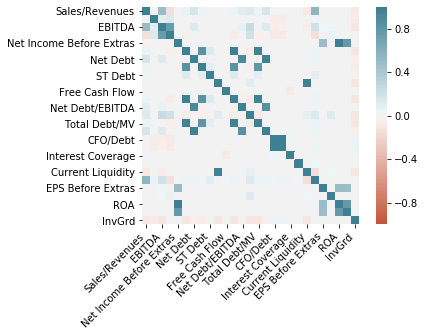

In [11]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## PCA

In [12]:
X,y = df.iloc[:,0:26].values, df.iloc[:, 27].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=11)

In [14]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

[3.63072345e-01 3.57195345e-01 1.04989895e-01 5.73728563e-02
 4.68238254e-02 1.65429331e-02 1.01062839e-02 9.46127327e-03
 9.40722039e-03 8.52776268e-03 6.76441288e-03 3.15635565e-03
 2.99607130e-03 1.63063268e-03 1.28979527e-03 5.17021954e-04
 6.29147309e-05 2.78744671e-05 1.91340911e-05 1.19001844e-05
 8.92866733e-06 6.67696296e-06 4.01067585e-06 2.92883697e-06
 1.45845463e-06 1.42724897e-07]


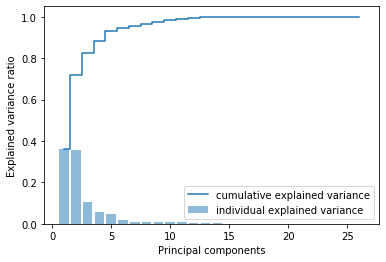

PCA Table 1


In [15]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
plt.bar(range(1,27), pca.explained_variance_ratio_, alpha=0.5, align='center',label='individual explained variance')
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.step(range(1,27), cum_var, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()
print("PCA Table 1")

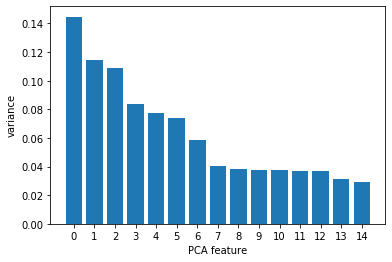

PCA Table 2


In [16]:
pca2 = PCA(n_components=15)
X_train_c3 = pca2.fit_transform(X_train_std)
features = range(pca2.n_components_)
plt.bar(features, pca2.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()
print("PCA Table 2")

In [17]:
cov_mat = np.cov(X_train_std.T)
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)
print("Eigen Values: \n",eigen_vals)

Eigen Values: 
 [3.76580938e+00 2.97453777e+00 2.84077608e+00 2.18164412e+00
 2.01848740e+00 1.93023938e+00 1.52691312e+00 7.69086155e-01
 8.11285627e-01 1.04397867e+00 9.62315912e-01 9.64765725e-01
 9.93856224e-01 9.86545554e-01 9.82996638e-01 4.02275503e-01
 3.70369932e-01 2.37611841e-01 1.31299302e-01 5.36874900e-02
 3.53342606e-02 1.72732224e-02 1.05977610e-02 5.40928354e-03
 2.85875114e-04 3.02593782e-03]


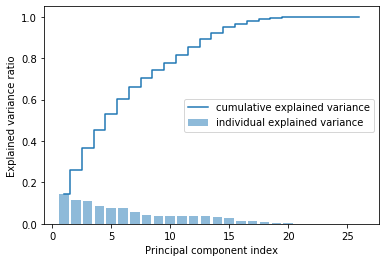

PCA Table 1


In [18]:

pca2 = PCA(n_components=15)
X_train_c3 = pca2.fit_transform(X_train_std)
features = range(pca2.n_components_)

tot = sum(eigen_vals)
var_exp = [(i/tot)for i in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,27), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,27),cum_var_exp, where = 'mid',label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()
print("PCA Table 1")

In [21]:
print("PCA Table 3:")
df_pca_result=pd.DataFrame({"Feature":list(df.iloc[0:,0:26].columns),
              "Expalined Variance PCA":pca.explained_variance_ratio_}).sort_values(
    "Expalined Variance PCA",ascending=False)
df_pca_result["Explained Variance Cumulative"]=df_pca_result["Expalined Variance PCA"].cumsum()
print(df_pca_result)

PCA Table 3:
                     Feature  Expalined Variance PCA  \
0             Sales/Revenues            3.630723e-01   
1               Gross Margin            3.571953e-01   
2                     EBITDA            1.049899e-01   
3              EBITDA Margin            5.737286e-02   
4   Net Income Before Extras            4.682383e-02   
5                 Total Debt            1.654293e-02   
6                   Net Debt            1.010628e-02   
7                    LT Debt            9.461273e-03   
8                    ST Debt            9.407220e-03   
9                       Cash            8.527763e-03   
10            Free Cash Flow            6.764413e-03   
11         Total Debt/EBITDA            3.156356e-03   
12           Net Debt/EBITDA            2.996071e-03   
13                  Total MV            1.630633e-03   
14             Total Debt/MV            1.289795e-03   
15               Net Debt/MV            5.170220e-04   
16                  CFO/Debt       